# Q4 Shoulders of Giants (15 points)
As we have already seen, deep networks can sometimes be hard to optimize. Often times they heavily overfit on small training sets. Many approaches have been proposed to counter this, eg, [Krahenbuhl et al. (ICLR’16)](http://arxiv.org/pdf/1511.06856.pdf), self-supervised learning, etc. However, the most effective approach remains pre-training the network on large, well-labeled supervised datasets such as ImageNet. 

While training on the full ImageNet data is beyond the scope of this assignment, people have already trained many popular/standard models and released them online. In this task, we will initialize a ResNet-18 model with pre-trained ImageNet weights (from `torchvision`), and finetune the network for PASCAL classification.

## 4.1 Load Pre-trained Model (7 pts)\
Load the pre-trained weights up to the second last layer, and initialize last layer from scratch (the very last layer that outputs the classes).

The model loading mechanism is based on names of the weights. It is easy to load pretrained models from `torchvision.models`, even when your model uses different names for weights. Please briefly explain how to load the weights correctly if the names do not match ([hint](https://discuss.pytorch.org/t/loading-weights-from-pretrained-model-with-different-module-names/11841)).

**YOUR ANSWER HERE**

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset


# Pre-trained weights up to second-to-last layer
# final layers should be initialized from scratch!
class PretrainedResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.pretrained = models.resnet18(pretrained=True)
        self.pretrained.fc = nn.Linear(512, 20)
        self.sig = nn.Sigmoid()
    
    def forward(self, x):
        logits = self.pretrained(x)
        return self.sig(logits)
    
    def forward_features(self, x):
        x = self.pretrained.conv1(x)
        x = self.pretrained.bn1(x)
        x = self.pretrained.relu(x)
        x = self.pretrained.maxpool(x)
        x = self.pretrained.layer1(x)
        x = self.pretrained.layer2(x)
        x = self.pretrained.layer3(x)
        x = self.pretrained.layer4(x)
        x = self.pretrained.avgpool(x)
        return x
    

Train the model with a similar hyperparameter setup as in the scratch case. No need to freeze the loaded weights. Show the learning curves (training loss, testing MAP) for 10 epochs. Please evaluate your model to calculate the MAP on the testing dataset every 100 iterations. Also feel free to tune the hyperparameters to improve performance.

**REMEMBER TO SAVE MODEL AT END OF TRAINING**

In [4]:
args = ARGS(lr=0.0001, gamma=0.70, epochs=10, log_every=100, val_every=100, test_batch_size=512, batch_size=32, use_cuda=True)
model = PretrainedResNet()
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, args.step_size, gamma=args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler, model_name='resnet_finetuned')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.842778
0.08321969562038846
Train Epoch: 0 [100 (64%)]	Loss: 0.135048
0.7654220687696534
Train Epoch: 1 [200 (27%)]	Loss: 0.074368
0.8144729261841819
Train Epoch: 1 [300 (91%)]	Loss: 0.053133
0.8298551614179456
Train Epoch: 2 [400 (55%)]	Loss: 0.051945
0.8380146812108149
Train Epoch: 3 [500 (18%)]	Loss: 0.039175
0.8426671177530591
Train Epoch: 3 [600 (82%)]	Loss: 0.033336
0.843094513190023
Train Epoch: 4 [700 (46%)]	Loss: 0.026231
0.8433836791993151
Train Epoch: 5 [800 (10%)]	Loss: 0.018942
0.8433562364868843
Train Epoch: 5 [900 (73%)]	Loss: 0.018844
0.8425709525151369
Train Epoch: 6 [1000 (37%)]	Loss: 0.017491
0.843212941537508
Train Epoch: 7 [1100 (1%)]	Loss: 0.016047
0.8434736132642418
Train Epoch: 7 [1200 (64%)]	Loss: 0.019922
0.8422612685897362
Train Epoch: 8 [1300 (28%)]	Loss: 0.014855
0.8428208279619934
Train Epoch: 8 [1400 (92%)]	Loss: 0.019463
0.8427232915613354
Train Epoch: 9 [1500 (55%)]	Loss: 0.017669
0.8423146312464406
test map: 0.84259216007

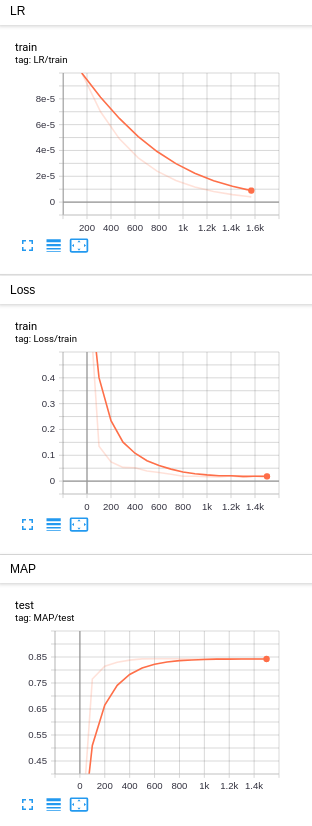